In [5]:
#mengimport library yang di butuh kan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [4]:
# Lokasi file ZIP kamu
zip_path = '/content/kamus-alay-master.zip'

# Buka file ZIP
with zipfile.ZipFile(zip_path, 'r') as z:
    # (Opsional) Lihat daftar isi dalam ZIP
    print(z.namelist())

    # Buka file CSV yang ada di dalam ZIP
    with z.open('kamus-alay-master/colloquial-indonesian-lexicon.csv') as f:
        df = pd.read_csv(f)

# Tampilkan 5 baris pertama
print(df.head())

['kamus-alay-master/', 'kamus-alay-master/README.md', 'kamus-alay-master/colloquial-indonesian-lexicon.csv']
     slang    formal  In-dictionary  \
0     woww       wow              1   
1    aminn      amin              1   
2      met   selamat              1   
3   netaas   menetas              1   
4  keberpa  keberapa              0   

                                             context  category1 category2  \
0                                                wow   elongasi         0   
1  Selamat ulang tahun kakak tulus semoga panjang...   elongasi         0   
2  Met hari netaas kak!? Wish you all the best @t...  abreviasi         0   
3  Met hari netaas kak!? Wish you all the best @t...   afiksasi  elongasi   
4                           Birthday yg keberpa kak?  abreviasi         0   

  category3  
0         0  
1         0  
2         0  
3         0  
4         0  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15006 entries, 0 to 15005
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   slang          15006 non-null  object
 1   formal         15006 non-null  object
 2   In-dictionary  15006 non-null  int64 
 3   context        15006 non-null  object
 4   category1      15006 non-null  object
 5   category2      15006 non-null  object
 6   category3      15006 non-null  object
dtypes: int64(1), object(6)
memory usage: 820.8+ KB


In [7]:
#memeriksa mising value table day
df.isna().sum()


,0
slang,0
formal,0
In-dictionary,0
context,0
category1,0
category2,0
category3,0


In [8]:
#memeriksa duplikasi day
print("Jumlah duplikasi: ",df.duplicated().sum())

Jumlah duplikasi:  1176


In [9]:
#memeriksa parameter statistik day
df.describe()

,In-dictionary
count,15006.000000
mean,0.914434
std,0.279731
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [11]:
# Hapus kolom yang tidak dibutuhkan
drop_columns = ["category1", "category2", "category3"]
df_clean =df.drop(columns=drop_columns)


In [12]:
# melihat rangkuman parameter statistik dari data day_df
df.describe(include="all")


,slang,formal,In-dictionary,context,category1,category2,category3
count,15006,15006,15006.000000,15006,15006,15006,15006
unique,4331,2003,NaN,4909,17,17,11
top,yg,yang,NaN,ibu ashanti khadiran ibu dlm kel. kecil pak an...,abreviasi,0,0
freq,833,845,NaN,50,7162,12988,14875
mean,NaN,NaN,0.914434,NaN,NaN,NaN,NaN
std,NaN,NaN,0.279731,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


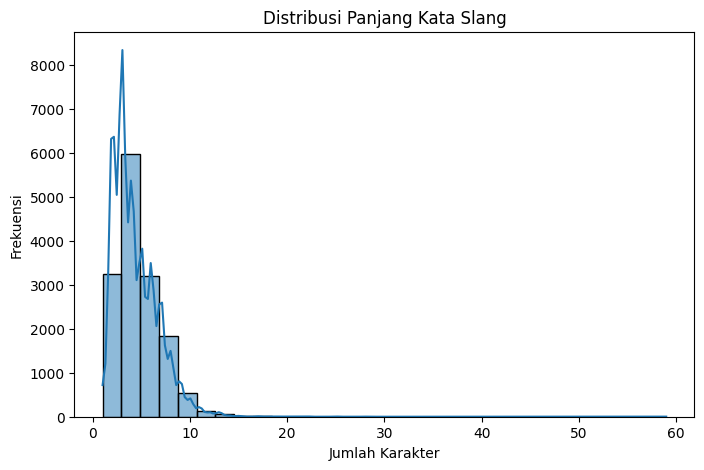

In [14]:
# Tambahkan kolom panjang kata slang
df_clean["panjang_kata"] = df_clean["slang"].apply(len)

# Visualisasi histogram panjang kata
plt.figure(figsize=(8, 5))
sns.histplot(df_clean["panjang_kata"], bins=30, kde=True)
plt.title("Distribusi Panjang Kata Slang")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Frekuensi")
plt.show()


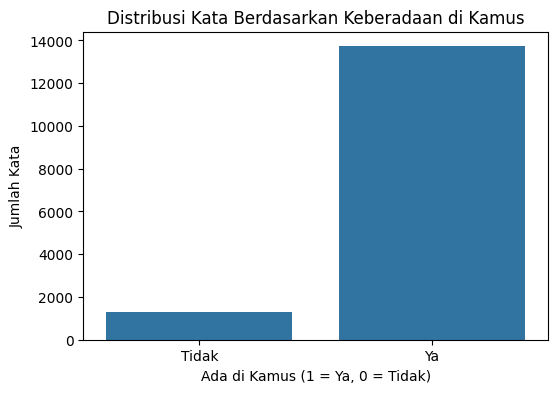

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x="In-dictionary", data=df_clean)
plt.title("Distribusi Kata Berdasarkan Keberadaan di Kamus")
plt.xlabel("Ada di Kamus (1 = Ya, 0 = Tidak)")
plt.ylabel("Jumlah Kata")
plt.xticks([0, 1], ["Tidak", "Ya"])
plt.show()
